Data Pre-processing Steps:

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Exploratory Data Analysis:

Model Creation and Testing:

Training Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Training Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0

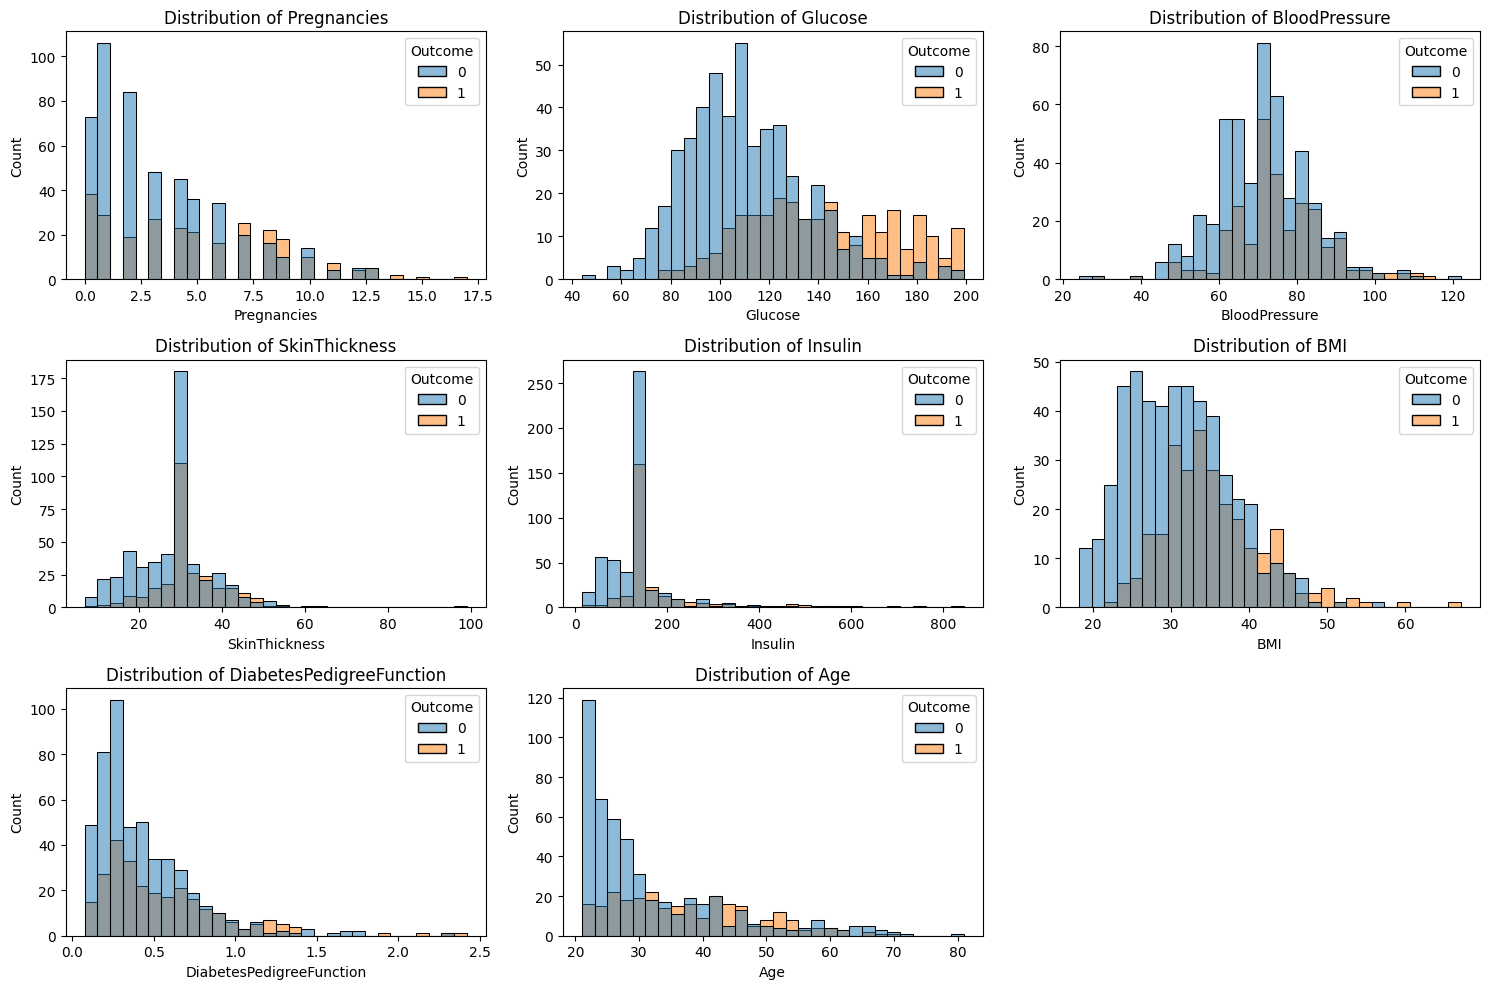

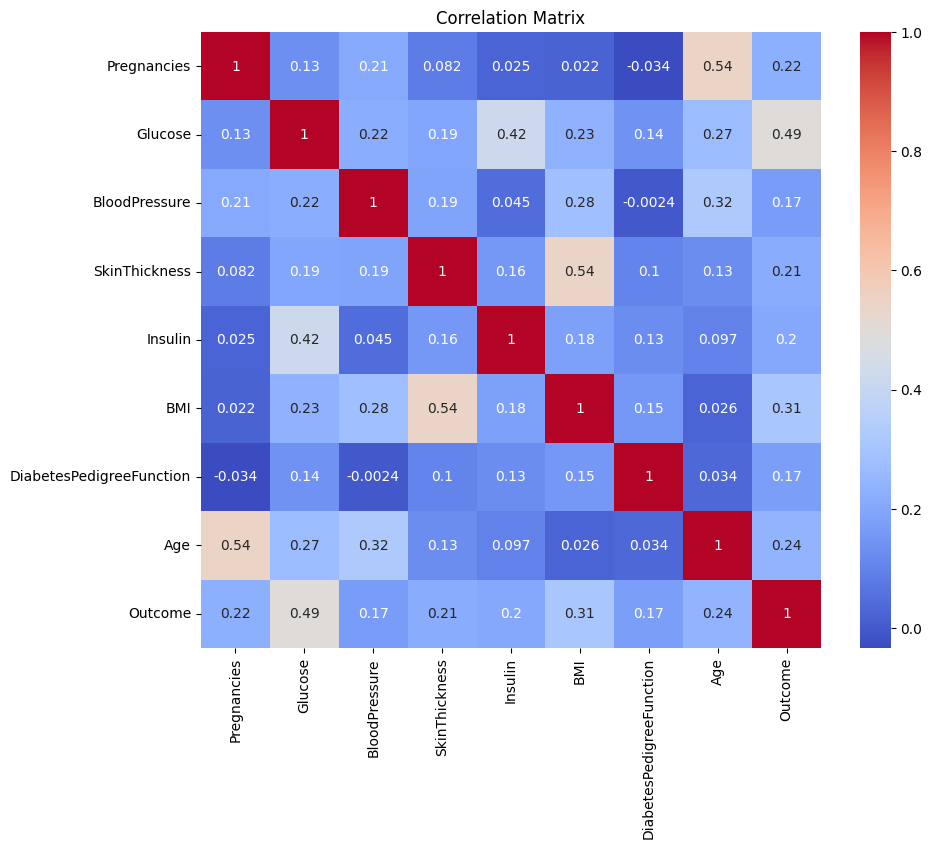

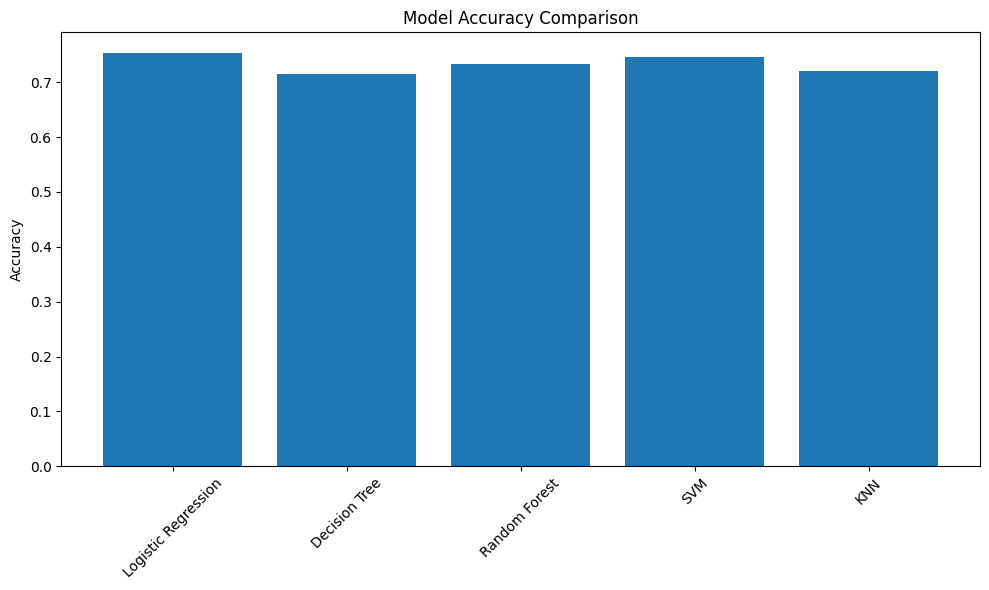

In [ ]:
# Diabetes Prediction using Multiple ML Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', 
                 names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

# Data Pre-processing (1 mark)
print("Data Pre-processing Steps:")

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Replace 0 values with NaN where it doesn't make sense
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    # Create a mask for zero values
    zero_mask = df[column] == 0
    # Replace zeros with NaN
    df.loc[zero_mask, column] = np.nan

# Fill missing values with median - using the recommended approach
for column in columns_to_check:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

# Data Visualization / EDA (0.5 marks)
print("\nExploratory Data Analysis:")

plt.figure(figsize=(15, 10))

# Distribution plots
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, hue='Outcome', bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Model Creation and Testing (2.5 marks)
print("\nModel Creation and Testing:")

# Prepare data for modeling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create dictionary to store model results
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Store results
    results[name] = model.score(X_test_scaled, y_test)

# Visualize model comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.tight_layout()

# Print final results
print("\nModel Accuracy Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")